In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_stocks = pd.read_parquet('/content/drive/MyDrive/stock_pp/data/processed/stocks_clean.parquet')
df_stocks.head()

,date,open,high,low,close,volume,ticker,daily_pct_change,price_range,daily_return,cumulative_return
0,2020-10-26,110.899566,113.370271,109.800390,111.911194,111850700.0,aapl,0.912201,3.569880,NaN,NaN
1,2020-10-27,112.339175,114.080340,111.415096,113.418892,92276800.0,aapl,0.961123,2.665245,1.347227,1.347227
2,2020-10-28,111.911175,112.280806,108.068936,108.166206,143937800.0,aapl,-3.346376,4.211869,-4.631226,-3.346392
3,2020-10-29,109.304306,113.739897,109.138938,112.173820,146129200.0,aapl,2.625253,4.600959,3.705052,0.234674
4,2020-10-30,108.030037,108.934664,104.781163,105.890060,190272600.0,aapl,-1.980909,4.153502,-5.601806,-5.380278


In [ ]:
df_stocks = df_stocks.sort_values(by='date').reset_index(drop=True)

In [ ]:

df_stocks['price_range'] = df_stocks['high'] - df_stocks['low']


df_stocks['ma_7'] = df_stocks['close'].rolling(window=7).mean()
df_stocks['ma_30'] = df_stocks['close'].rolling(window=30).mean()

window_length = 14
delta = df_stocks['close'].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
avg_gain = pd.Series(gain).rolling(window=window_length).mean()
avg_loss = pd.Series(loss).rolling(window=window_length).mean()
rs = avg_gain / avg_loss
df_stocks['rsi_14'] = 100 - (100 / (1 + rs))

ema_12 = df_stocks['close'].ewm(span=12, adjust=False).mean()
ema_26 = df_stocks['close'].ewm(span=26, adjust=False).mean()
df_stocks['macd'] = ema_12 - ema_26

rolling_mean = df_stocks['close'].rolling(window=20).mean()
rolling_std = df_stocks['close'].rolling(window=20).std()
df_stocks['bollinger_upper'] = rolling_mean + (rolling_std * 2)
df_stocks['bollinger_lower'] = rolling_mean - (rolling_std * 2)

df_stocks['rolling_std_7'] = df_stocks['close'].rolling(window=7).std()


df_stocks['volume_change'] = df_stocks['volume'].pct_change()

df_stocks['lag_1'] = df_stocks['close'].shift(1)

df_stocks['day_of_week'] = df_stocks['date'].dt.dayofweek

In [ ]:
df_stocks.sample(10)

,date,open,high,low,close,volume,ticker,daily_pct_change,price_range,daily_return,...,ma_7,ma_30,rsi_14,macd,bollinger_upper,bollinger_lower,rolling_std_7,volume_change,lag_1,day_of_week
5775,2021-08-20,138.133432,138.625636,137.068455,138.464554,6974100.0,jpm,0.239712,1.557181,0.285182,...,112.577087,162.547218,51.290211,-8.384157,443.854790,-79.019169,57.638374,-0.587292,47.177795,4
12259,2022-07-22,55.674884,56.119338,55.620459,55.865364,11644700.0,ko,0.342129,0.498878,0.374844,...,116.765287,129.025020,45.190610,-16.783382,363.771309,-91.467540,77.411052,-0.790589,19.240000,4
24746,2024-05-01,173.000000,177.014999,170.955994,172.309998,1132700.0,zs,-0.398845,6.059006,-0.364291,...,138.421083,145.177079,50.021364,4.871243,375.369853,-87.162971,61.399820,-0.988032,179.000000,2
30157,2025-02-10,1049.177615,1060.148104,1043.193712,1059.071045,2036900.0,cost,0.942970,16.954391,1.734989,...,286.228550,266.076661,50.293375,42.147701,1018.630687,-334.718132,357.467550,-0.973722,350.730011,0
32982,2025-07-07,70.826819,70.826819,70.261158,70.469559,16984700.0,ko,-0.504414,0.565662,-0.476521,...,437.728094,249.563411,49.693161,69.379358,969.287411,-412.827824,495.029375,6.470071,1289.619995,0
28012,2024-10-17,232.348639,232.766707,229.452131,231.074570,32993800.0,aapl,-0.548344,3.314576,0.159641,...,266.983789,248.838901,50.797332,24.666471,569.804660,-113.797791,227.282048,2.696080,687.650024,3
23266,2024-02-14,173.470001,178.740005,172.880005,178.699997,57402500.0,amd,3.014928,5.860001,4.173956,...,106.539315,164.925088,35.033815,-19.194081,586.444902,-214.720237,54.161485,8.574903,139.904373,2
6425,2021-09-23,45.223263,45.352724,44.980126,45.081169,15585300.0,wmt,-0.314205,0.372598,0.056066,...,161.754474,165.105102,44.971757,1.623725,397.974209,-24.308838,109.965867,-0.565173,251.213333,3
15058,2022-12-13,154.725927,155.519301,153.754255,154.690262,7838800.0,cvx,-0.023050,1.765046,2.226783,...,144.445900,113.478624,52.817379,3.245219,337.908269,-86.203595,82.314430,-0.677486,97.583908,1
34295,2025-09-11,957.799988,965.159973,954.280029,964.320007,1532000.0,cost,0.680729,10.879944,0.839707,...,258.118574,267.528873,62.064761,28.976795,937.486768,-344.028652,316.170050,-0.736747,158.630005,3


In [ ]:
for lag in [1, 2, 3, 5, 7]:
    df_stocks[f'lag_{lag}'] = df_stocks['close'].shift(lag)


In [ ]:
df_stocks['rolling_mean_3'] = df_stocks['close'].rolling(3).mean()
df_stocks['rolling_std_3'] = df_stocks['close'].rolling(3).std()

In [ ]:
df_stocks.dropna(inplace=True)

In [ ]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35111 entries, 29 to 35139
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               35111 non-null  datetime64[ns]
 1   open               35111 non-null  float64       
 2   high               35111 non-null  float64       
 3   low                35111 non-null  float64       
 4   close              35111 non-null  float64       
 5   volume             35111 non-null  float64       
 6   ticker             35111 non-null  object        
 7   daily_pct_change   35111 non-null  float64       
 8   price_range        35111 non-null  float64       
 9   daily_return       35111 non-null  float64       
 10  cumulative_return  35111 non-null  float64       
 11  ma_7               35111 non-null  float64       
 12  ma_30              35111 non-null  float64       
 13  rsi_14             35111 non-null  float64       
 14  macd      

In [ ]:
df_stocks['ticker'].unique()

array(['dis', 'googl', 'jpm', 'intc', 'amzn', 'aapl', 'ko', 'meta', 'ba',
       'tsla', 'xom', 'pypl', 'crm', 'zs', 'cvx', 'vz', 'f', 'wmt', 'bac',
       'pg', 'bx', 'msft', 'cost', 'nflx', 'gm', 'nio', 'amd', 'tsm'],
      dtype=object)

In [ ]:
ticker = 'googl'
df_ticker = df_stocks[df_stocks['ticker'] == ticker]
df_ticker = df_ticker.sort_values("date")

df_ticker.set_index("date", inplace=True)

df_ticker.drop(columns=["ticker"], inplace=True)

df_ticker.head()


,open,high,low,close,volume,daily_pct_change,price_range,daily_return,cumulative_return,ma_7,...,rolling_std_7,volume_change,lag_1,day_of_week,lag_2,lag_3,lag_5,lag_7,rolling_mean_3,rolling_std_3
date,,,,,,,,,,,,,,,,,,,,,
2020-10-27,78.902303,79.551322,78.309392,79.396393,25902000.0,0.626204,1.241930,0.920907,0.920907,70.776788,...,44.858115,2.801403,121.288040,1,79.865204,57.158443,6.163237,26.847956,93.516546,24.051962
2020-10-28,76.969641,77.158335,74.907365,75.022568,45174000.0,-2.529664,2.250970,-5.508846,-4.638671,130.767513,...,108.079640,2.009433,32.956787,2,41.732601,336.331635,192.309998,28.440001,49.903985,22.191465
2020-10-29,75.331424,78.892859,75.308086,77.310776,55406000.0,2.627525,3.584772,3.050026,-1.730125,133.843727,...,101.811427,6.264360,195.039993,3,85.341873,336.885559,42.066097,26.542036,119.230881,65.775305
2020-10-30,82.800917,83.490163,79.529974,80.251991,99878000.0,-3.078378,3.960189,3.804406,2.008460,133.196508,...,34.659398,56.358296,135.750000,4,121.824173,151.807495,129.346664,144.389999,112.608721,28.873875
2020-11-02,80.620957,82.344073,80.159138,80.659691,44228000.0,0.048045,2.184935,0.508024,2.526687,117.826029,...,60.000646,10.187332,230.030273,0,133.503326,42.762749,135.750000,151.807495,148.064430,75.742406


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_ticker)

scaled_df = pd.DataFrame(scaled_data, index=df_ticker.index, columns=df_ticker.columns)

lookback = 60


In [ ]:
def create_sequences(df, target_col, lookback):
    X, y = [], []
    for i in range(lookback, len(df)):
        X.append(df.iloc[i-lookback:i].values)
        y.append(df.iloc[i][target_col])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_df, target_col=df_ticker.columns.get_loc("close"), lookback=lookback)


/tmp/ipython-input-1344133882.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(df.iloc[i][target_col])


In [ ]:
split_ratio = 0.8
split_point = int(len(X) * split_ratio)

X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]


In [ ]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 60, 128)        │        78,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,321 (501.25 KB)

 Trainable params: 128,321 (501.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=60,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 0.0425 - val_loss: 0.0048
Epoch 2/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 3/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 4/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 5/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 6/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 7/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 8/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 0.0016 - val_loss: 8.7892e-04
Epoch 10/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - loss: 0.0015 - val_loss: 9.3583e-04
Epoch 11/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0013 - val_loss: 7.6193e-04
Epoch 12/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 3

In [ ]:
y_pred = model.predict(X_test)

close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[df_ticker.columns.get_loc("close")], scaler.scale_[df_ticker.columns.get_loc("close")]
y_test_actual = y_test / close_scaler.scale_ + close_scaler.min_
y_pred_actual = y_pred.flatten() / close_scaler.scale_ + close_scaler.min_

mae = mean_absolute_error(y_test_actual, y_pred_actual)
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
MAE: 5.85, RMSE: 7.67


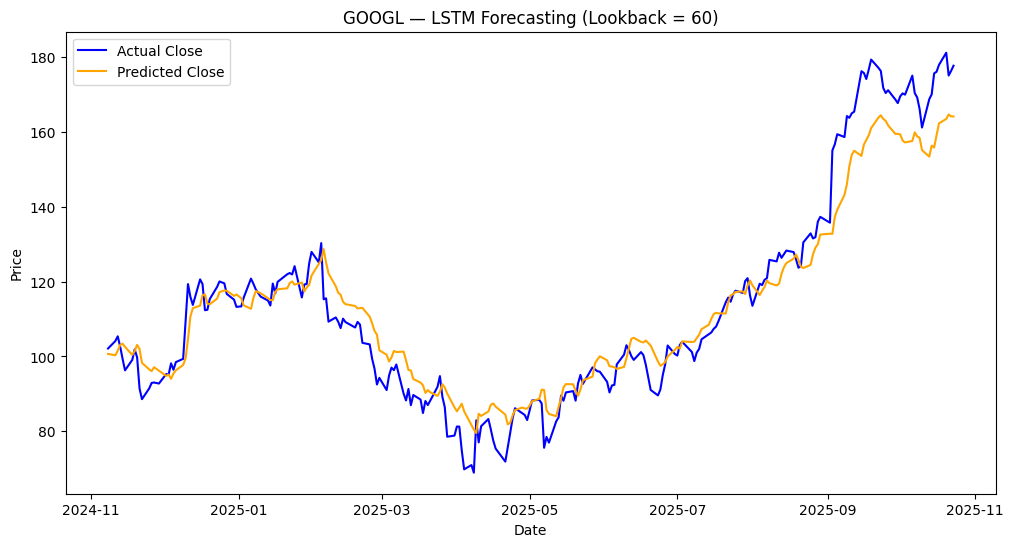

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_ticker.index[-len(y_test):], y_test_actual, label='Actual Close', color='blue')
plt.plot(df_ticker.index[-len(y_test):], y_pred_actual, label='Predicted Close', color='orange')
plt.title(f"{ticker.upper()} — LSTM Forecasting (Lookback = {lookback})")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()